In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
name='read_write_caching_strategy_'
directory = 'results/simple_strategy/cache_capacity_2500/2019_05_08_14_29'
caching_strategy_dir = f'{directory}/caching_strategy'

In [5]:
import math
observation_df = pd.read_csv(f'{caching_strategy_dir}/{name}_observation_logger.log',
                             names=['timestamp', 'key', 'observation'],
                             usecols=['observation', 'key'])
labels = ['5%', '10%', '25%', '50%', '100%']
split_num = math.ceil(observation_df.count()['key'] /len(labels))
observations = observation_df.groupby(('observation', observation_df.index // split_num)).count().unstack(0).fillna(0)['key']


FileNotFoundError: [Errno 2] File b'results/simple_strategy/cache_capacity_2500/2019_05_08_14_29/caching_strategy/read_write_caching_strategy__observation_logger.log' does not exist: b'results/simple_strategy/cache_capacity_2500/2019_05_08_14_29/caching_strategy/read_write_caching_strategy__observation_logger.log'

Text(0, 0.5, 'Hit Ratio')

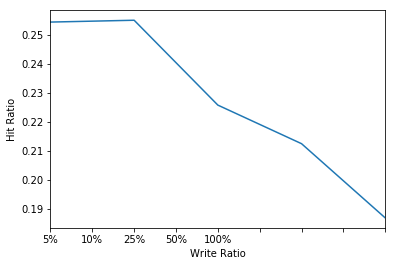

In [128]:
hit_ratio = observations['Hit']/observations.sum(axis=1)
ax = hit_ratio.plot()
ax.set_xticklabels(labels)
ax.set_xlabel('Write Ratio')
ax.set_ylabel('Hit Ratio')

In [ ]:
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'reward'], usecols=['reward'])
episode_reward_df.groupby((episode_reward_df.index // 10000)).sum().plot()

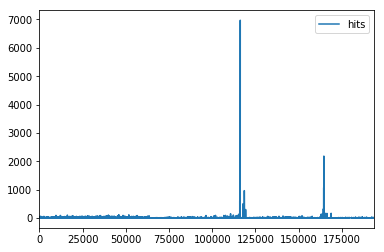

In [16]:
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}entry_hits_logger.log', names=['timestamp', 
                                                                                              'key', 
                                                                                              'hits'], usecols=['hits'])
episode_reward_df.plot()
